<a href="https://colab.research.google.com/github/melonehco/neural-style-transfer/blob/master/nst_testing_stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow_addons.image import mean_filter2d
import IPython.display as display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

from google.colab import drive
from google.colab import files

In [6]:
# This will prompt for authorization.
drive.mount('/content/drive')

# load images from Google Drive
# !unzip /content/drive/My\ Drive/digital\ image\ processing/styles.zip
# !unzip /content/drive/My\ Drive/digital\ image\ processing/content.zip
!unzip /content/drive/My\ Drive/digital\ image\ processing/1-edge-loss.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/My Drive/digital image processing/1-edge-loss.zip
replace 1-edge-loss/output_4.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
def load_img(path_to_img):
    '''return tensor of image from given path'''
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def imshow(image, title=None):
    '''display image using matplotlib'''
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

def high_pass_x_y(image):
    '''get high-frequency components'''
    x_var = image[:,:,1:,:] - image[:,:,:-1,:]
    y_var = image[:,1:,:,:] - image[:,:-1,:,:]

    return x_var, y_var

# keep the pixel values between 0 and 1
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

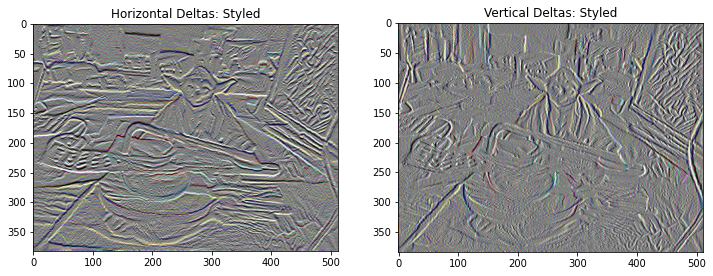

In [8]:
path = '1-edge-loss/output_4.png'
image = load_img(path)

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(1,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(1,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")